In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Employee_Performance-1.csv')

# Display the first few rows of the dataset and check for missing values, duplicates, and general summary statistics
data.head(), data.info(), data.describe(
), data.isnull().sum(), data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EmployeeID         1468 non-null   int64  
 1   Department         1468 non-null   object 
 2   Gender             1468 non-null   object 
 3   Experience         1468 non-null   int64  
 4   TrainingHours      1468 non-null   int64  
 5   PerformanceRating  1468 non-null   float64
 6   Salary             1468 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 80.4+ KB


(   EmployeeID Department  Gender  Experience  TrainingHours  \
 0        1001         IT    Male           4              5   
 1        1002  Marketing  Female           0             50   
 2        1003      Sales    Male           0              5   
 3        1004         HR    Male           1              5   
 4        1005         HR  Female           9              5   
 
    PerformanceRating  Salary  
 0               1.00   19000  
 1               5.50    6900  
 2               1.00    6000  
 3               1.00    6000  
 4               1.04   38000  ,
 None,
         EmployeeID   Experience  TrainingHours  PerformanceRating  \
 count  1468.000000  1468.000000    1468.000000        1468.000000   
 mean   1734.500000     2.838556      32.144414           3.561512   
 std     423.919411     2.527657      10.106029           1.044987   
 min    1001.000000     0.000000       5.000000           1.000000   
 25%    1367.750000     1.000000      25.000000           2.8400

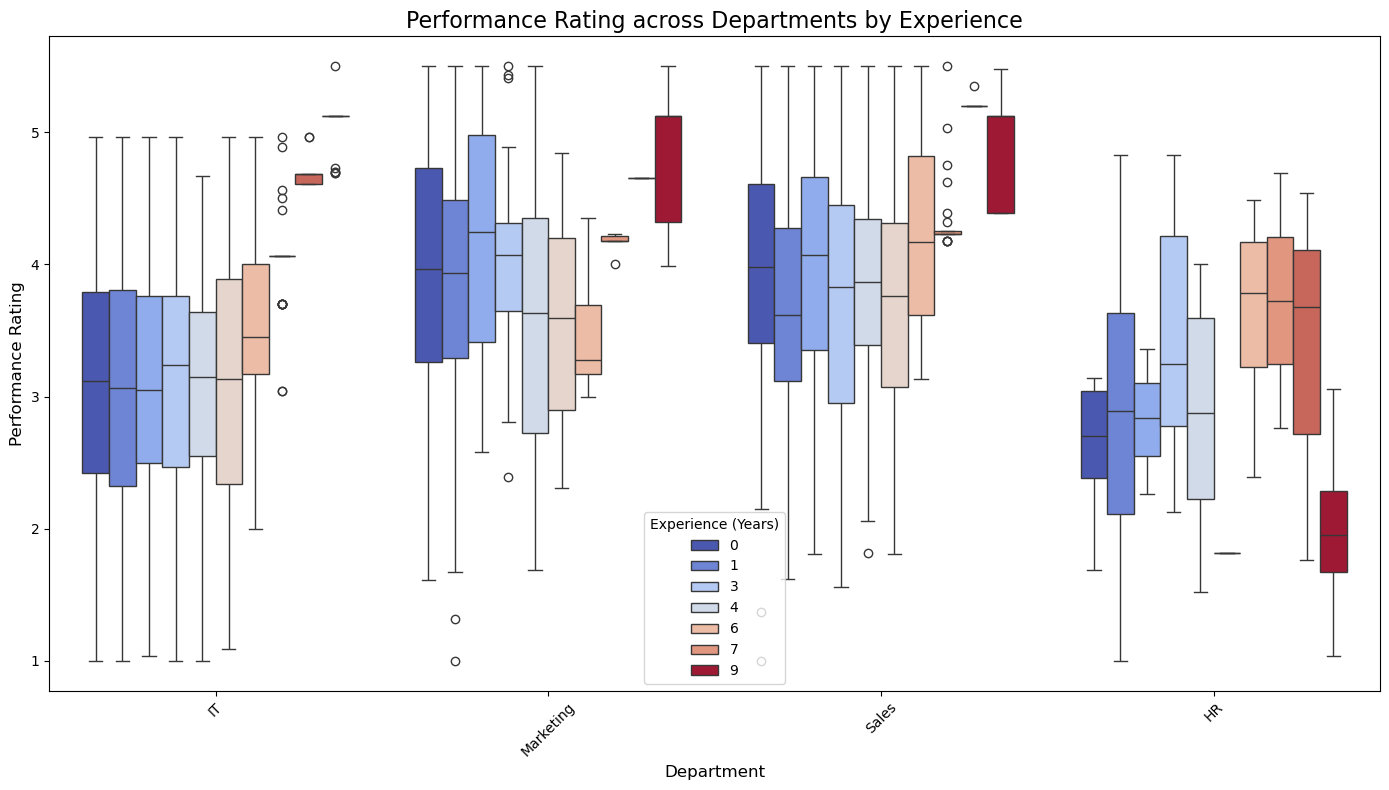

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(14, 8))

# Create a boxplot to visualize the relationship between experience and performance rating in different departments
sns.boxplot(x='Department', y='PerformanceRating',
            hue='Experience', data=data, palette='coolwarm')

# Set title and labels
plt.title('Performance Rating across Departments by Experience', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Performance Rating', fontsize=12)
plt.legend(title='Experience (Years)')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()